#CMOR Assignment

In [798]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score

#Load Data

In [799]:
#Loading Data
Data = pd.read_csv("/content/13058_2005_1201_MOESM3_ESM (1).csv") 

In [800]:
Data

,Batch Labels,1,1.1,1.2,1.3,1.4,1.5,1.6,2,2.1,...,15.4,15.5,15.6,16,16.1,16.2,16.3,16.4,16.5,16.6
0,Class Labels,C,C,N,C,C,N,N,N,N,...,N,N,C,N,C,N,C,N,N,C
1,Gene position on the array,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1D,-0.1936434,1.43E-02,-1.71E-02,0.1890488,-2.66E-02,1.21E-02,2.19E-02,-0.1177097,-8.90E-04,...,-0.2166262,8.90E-02,0.1258077,5.00E-02,2.99E-03,1.75E-02,-4.03E-02,4.68E-03,-8.34E-02,4.85E-02
3,1E,-3.21E-02,-6.01E-03,-6.90E-02,3.32E-02,-2.00E-02,-6.88E-03,0.1008878,-1.91E-03,-5.99E-03,...,-7.80E-02,0.1146925,1.63E-02,2.37E-02,-3.60E-02,-6.35E-02,-1.29E-02,4.27E-02,4.15E-02,4.47E-03
4,1F,-0.123166,8.35E-02,-0.1650792,4.34E-02,2.09E-02,-1.64E-02,0.1568578,-0.2782608,-0.1065572,...,-0.3565552,-0.1237872,6.13E-02,0.1000406,-6.37E-02,-2.79E-02,0.1070109,-0.2181707,-1.46E-02,0.1173499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,32AP,-2.81E-03,-2.66E-02,3.04E-02,-5.86E-03,-2.57E-02,1.78E-02,1.28E-02,0.1863724,3.34E-02,...,9.99E-03,8.17E-02,1.12E-02,-1.46E-02,0.126609,-2.54E-02,-6.41E-02,7.83E-02,-5.79E-02,-4.28E-02
1366,32AQ,-0.1229256,0.4610553,0.27619,-7.92E-02,-0.2037133,-0.146247,-0.1851898,-8.22E-02,-0.1810582,...,-9.53E-02,-0.2577605,-0.1187802,-0.3388405,0.1245186,0.4311497,0.1037686,-0.4744276,0.2177832,-6.40E-02
1367,32AR,-4.36E-02,-7.49E-03,5.06E-02,3.46E-02,-6.72E-02,1.89E-02,1.43E-02,3.54E-02,-8.77E-02,...,6.07E-03,0.1122712,3.59E-02,-3.94E-02,8.03E-02,-2.88E-02,-2.34E-02,0.1131408,-5.72E-02,-4.46E-02
1368,32AS,-0.1137431,0.2059512,0.1356526,0.339391,-0.1383123,-0.1415243,-0.2874152,8.23E-02,-0.1224936,...,3.44E-02,7.61E-02,-2.45E-02,-0.1754372,0.4576257,0.1914028,5.47E-02,-0.2518545,-9.73E-02,-0.1790937


#Transposing the Data

In [801]:
#Transposing the Data
Data=Data.T
Data

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Batch Labels,Class Labels,Gene position on the array,1D,1E,1F,1H,1I,1J,1K,1L,...,32AJ,32AK,32AM,32AN,32AO,32AP,32AQ,32AR,32AS,32AU
1,C,NaN,-0.1936434,-3.21E-02,-0.123166,-7.88E-02,-7.60E-03,6.31E-03,-5.31E-03,-5.83E-02,...,-0.2256712,-0.1952721,-1.96E-02,-2.35E-02,-1.68E-02,-2.81E-03,-0.1229256,-4.36E-02,-0.1137431,-0.1388977
1.1,C,NaN,1.43E-02,-6.01E-03,8.35E-02,2.62E-02,6.19E-02,-1.13E-02,0.1198172,-4.35E-03,...,0.1223531,0.1772258,7.36E-03,0.3315255,-7.48E-02,-2.66E-02,0.4610553,-7.49E-03,0.2059512,9.00E-02
1.2,N,NaN,-1.71E-02,-6.90E-02,-0.1650792,-0.2578019,-7.00E-02,-8.34E-02,1.72E-02,-8.87E-02,...,-0.2408473,0.1005378,6.49E-02,-5.59E-02,9.30E-02,3.04E-02,0.27619,5.06E-02,0.1356526,-7.93E-02
1.3,C,NaN,0.1890488,3.32E-02,4.34E-02,0.1072714,5.28E-02,-2.43E-02,4.19E-02,-1.18E-03,...,0.6427518,0.2895683,-1.29E-02,-6.84E-02,-1.93E-04,-5.86E-03,-7.92E-02,3.46E-02,0.339391,0.1334472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16.2,N,NaN,1.75E-02,-6.35E-02,-2.79E-02,-8.04E-02,-5.77E-02,-6.99E-02,-9.85E-02,-1.88E-03,...,7.24E-03,5.43E-02,-9.88E-02,-5.64E-02,-1.67E-02,-2.54E-02,0.4311497,-2.88E-02,0.1914028,8.92E-02
16.3,C,NaN,-4.03E-02,-1.29E-02,0.1070109,4.85E-02,0.1138769,2.17E-02,0.1033078,-4.21E-02,...,6.83E-02,0.1064445,-7.21E-03,7.11E-04,-2.51E-02,-6.41E-02,0.1037686,-2.34E-02,5.47E-02,-4.35E-02
16.4,N,NaN,4.68E-03,4.27E-02,-0.2181707,-5.17E-02,-9.35E-02,8.16E-02,-8.13E-03,3.73E-03,...,-0.1079495,5.87E-02,8.96E-02,1.91E-02,6.69E-02,7.83E-02,-0.4744276,0.1131408,-0.2518545,-0.2023661
16.5,N,NaN,-8.34E-02,4.15E-02,-1.46E-02,4.76E-03,-2.86E-02,2.23E-02,6.14E-03,-6.49E-03,...,-9.23E-02,-0.1608275,-4.00E-02,1.22E-03,-5.43E-02,-5.79E-02,0.2177832,-5.72E-02,-9.73E-02,0.1354807


In [802]:
#making the header
header = Data.iloc[0] 
Data = Data[1:] 
Data.columns = header 
Data


Batch Labels,Class Labels,Gene position on the array,1D,1E,1F,1H,1I,1J,1K,1L,...,32AJ,32AK,32AM,32AN,32AO,32AP,32AQ,32AR,32AS,32AU
1,C,NaN,-0.1936434,-3.21E-02,-0.123166,-7.88E-02,-7.60E-03,6.31E-03,-5.31E-03,-5.83E-02,...,-0.2256712,-0.1952721,-1.96E-02,-2.35E-02,-1.68E-02,-2.81E-03,-0.1229256,-4.36E-02,-0.1137431,-0.1388977
1.1,C,NaN,1.43E-02,-6.01E-03,8.35E-02,2.62E-02,6.19E-02,-1.13E-02,0.1198172,-4.35E-03,...,0.1223531,0.1772258,7.36E-03,0.3315255,-7.48E-02,-2.66E-02,0.4610553,-7.49E-03,0.2059512,9.00E-02
1.2,N,NaN,-1.71E-02,-6.90E-02,-0.1650792,-0.2578019,-7.00E-02,-8.34E-02,1.72E-02,-8.87E-02,...,-0.2408473,0.1005378,6.49E-02,-5.59E-02,9.30E-02,3.04E-02,0.27619,5.06E-02,0.1356526,-7.93E-02
1.3,C,NaN,0.1890488,3.32E-02,4.34E-02,0.1072714,5.28E-02,-2.43E-02,4.19E-02,-1.18E-03,...,0.6427518,0.2895683,-1.29E-02,-6.84E-02,-1.93E-04,-5.86E-03,-7.92E-02,3.46E-02,0.339391,0.1334472
1.4,C,NaN,-2.66E-02,-2.00E-02,2.09E-02,4.58E-02,9.32E-03,2.25E-02,-7.29E-02,0.1182606,...,8.55E-02,-9.89E-02,-0.1003643,-0.1188955,-7.82E-03,-2.57E-02,-0.2037133,-6.72E-02,-0.1383123,0.1733148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16.2,N,NaN,1.75E-02,-6.35E-02,-2.79E-02,-8.04E-02,-5.77E-02,-6.99E-02,-9.85E-02,-1.88E-03,...,7.24E-03,5.43E-02,-9.88E-02,-5.64E-02,-1.67E-02,-2.54E-02,0.4311497,-2.88E-02,0.1914028,8.92E-02
16.3,C,NaN,-4.03E-02,-1.29E-02,0.1070109,4.85E-02,0.1138769,2.17E-02,0.1033078,-4.21E-02,...,6.83E-02,0.1064445,-7.21E-03,7.11E-04,-2.51E-02,-6.41E-02,0.1037686,-2.34E-02,5.47E-02,-4.35E-02
16.4,N,NaN,4.68E-03,4.27E-02,-0.2181707,-5.17E-02,-9.35E-02,8.16E-02,-8.13E-03,3.73E-03,...,-0.1079495,5.87E-02,8.96E-02,1.91E-02,6.69E-02,7.83E-02,-0.4744276,0.1131408,-0.2518545,-0.2023661
16.5,N,NaN,-8.34E-02,4.15E-02,-1.46E-02,4.76E-03,-2.86E-02,2.23E-02,6.14E-03,-6.49E-03,...,-9.23E-02,-0.1608275,-4.00E-02,1.22E-03,-5.43E-02,-5.79E-02,0.2177832,-5.72E-02,-9.73E-02,0.1354807


#Visualizing Class labels, Cancer and Non-Cancer

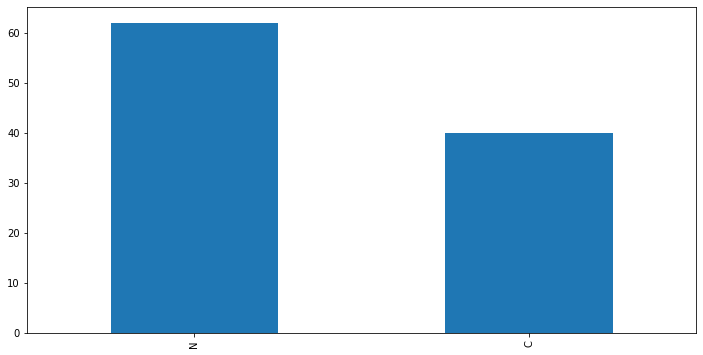

In [803]:
Data['Class Labels'].value_counts().plot(kind='bar')

#Finding Missing data

In [804]:
#Finding missing data 
total = Data.isnull().sum().sort_values(ascending = False)
total=pd.DataFrame(total)
total

,0
Batch Labels,
Gene position on the array,102
22V,0
22AD,0
22AC,0
22AB,0
...,...
11AF,0
11AE,0
11AD,0


#Getting 'X' Features

In [805]:
X= Data.iloc[:,2:1371] 

In [806]:
X

Batch Labels,1D,1E,1F,1H,1I,1J,1K,1L,1M,1N,...,32AJ,32AK,32AM,32AN,32AO,32AP,32AQ,32AR,32AS,32AU
1,-0.1936434,-3.21E-02,-0.123166,-7.88E-02,-7.60E-03,6.31E-03,-5.31E-03,-5.83E-02,3.01E-02,5.62E-02,...,-0.2256712,-0.1952721,-1.96E-02,-2.35E-02,-1.68E-02,-2.81E-03,-0.1229256,-4.36E-02,-0.1137431,-0.1388977
1.1,1.43E-02,-6.01E-03,8.35E-02,2.62E-02,6.19E-02,-1.13E-02,0.1198172,-4.35E-03,0.1415737,-2.68E-02,...,0.1223531,0.1772258,7.36E-03,0.3315255,-7.48E-02,-2.66E-02,0.4610553,-7.49E-03,0.2059512,9.00E-02
1.2,-1.71E-02,-6.90E-02,-0.1650792,-0.2578019,-7.00E-02,-8.34E-02,1.72E-02,-8.87E-02,-8.99E-03,-2.61E-02,...,-0.2408473,0.1005378,6.49E-02,-5.59E-02,9.30E-02,3.04E-02,0.27619,5.06E-02,0.1356526,-7.93E-02
1.3,0.1890488,3.32E-02,4.34E-02,0.1072714,5.28E-02,-2.43E-02,4.19E-02,-1.18E-03,8.03E-02,-4.45E-02,...,0.6427518,0.2895683,-1.29E-02,-6.84E-02,-1.93E-04,-5.86E-03,-7.92E-02,3.46E-02,0.339391,0.1334472
1.4,-2.66E-02,-2.00E-02,2.09E-02,4.58E-02,9.32E-03,2.25E-02,-7.29E-02,0.1182606,-0.127869,2.91E-02,...,8.55E-02,-9.89E-02,-0.1003643,-0.1188955,-7.82E-03,-2.57E-02,-0.2037133,-6.72E-02,-0.1383123,0.1733148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16.2,1.75E-02,-6.35E-02,-2.79E-02,-8.04E-02,-5.77E-02,-6.99E-02,-9.85E-02,-1.88E-03,0.1985309,-7.10E-02,...,7.24E-03,5.43E-02,-9.88E-02,-5.64E-02,-1.67E-02,-2.54E-02,0.4311497,-2.88E-02,0.1914028,8.92E-02
16.3,-4.03E-02,-1.29E-02,0.1070109,4.85E-02,0.1138769,2.17E-02,0.1033078,-4.21E-02,-2.27E-02,-2.66E-02,...,6.83E-02,0.1064445,-7.21E-03,7.11E-04,-2.51E-02,-6.41E-02,0.1037686,-2.34E-02,5.47E-02,-4.35E-02
16.4,4.68E-03,4.27E-02,-0.2181707,-5.17E-02,-9.35E-02,8.16E-02,-8.13E-03,3.73E-03,-8.18E-02,-2.48E-02,...,-0.1079495,5.87E-02,8.96E-02,1.91E-02,6.69E-02,7.83E-02,-0.4744276,0.1131408,-0.2518545,-0.2023661
16.5,-8.34E-02,4.15E-02,-1.46E-02,4.76E-03,-2.86E-02,2.23E-02,6.14E-03,-6.49E-03,-0.1487647,2.98E-02,...,-9.23E-02,-0.1608275,-4.00E-02,1.22E-03,-5.43E-02,-5.79E-02,0.2177832,-5.72E-02,-9.73E-02,0.1354807


In [807]:
X.columns

Index(['1D', '1E', '1F', '1H', '1I', '1J', '1K', '1L', '1M', '1N',
       ...
       '32AJ', '32AK', '32AM', '32AN', '32AO', '32AP', '32AQ', '32AR', '32AS',
       '32AU'],
      dtype='object', name='Batch Labels', length=1368)

#Feature Noramlization using MinMaxScaler

In [808]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
normal = MinMaxScaler().fit(X)

# transform training data
X = normal.transform(X)



In [809]:
X.shape

(102, 1368)

#Getting 'Y' labels

In [810]:
Y=Data['Class Labels']

Y

1       C
1.1     C
1.2     N
1.3     C
1.4     C
       ..
16.2    N
16.3    C
16.4    N
16.5    N
16.6    C
Name: Class Labels, Length: 102, dtype: object

In [819]:
#converting categorical label into 0 and 1
Y[np.where(Data=='C')[0]] = 1
Y[np.where(Data=='N')[0]] = 0
Y= Y.astype(np.int64)
Y

1       1
1.1     1
1.2     0
1.3     1
1.4     1
       ..
16.2    0
16.3    1
16.4    0
16.5    0
16.6    1
Name: Class Labels, Length: 102, dtype: int64

In [813]:
Data['Class Labels'].value_counts()

0    62
1    40
Name: Class Labels, dtype: int64

#Implimenting Leave one out cross validation for evaluation of randomforest binary classification 

In [814]:

# create loocv
cv = LeaveOneOut()



# creating splits
True_Y, Pred_Y = list(), list()
for train, test in cv.split(X):
	# splitting the data data

	X_train, X_test = X[train, :], X[test, :]
	Y_train, Y_test = Y[train], Y[test]

	# fitting model
	model = RandomForestClassifier(random_state=1)
	model.fit(X_train, Y_train)
 
	# evaluating the  model
	y = model.predict(X_test)
	# store
	True_Y.append(Y_test[0])
	Pred_Y.append(y[0])
# calculate accuracy
acc = accuracy_score(True_Y, Pred_Y)
print('Accuracy: %.3f' % acc)

Accuracy: 0.775


# Measuring Performance 
AUC, F1, Precission, Recall, Kappa

In [816]:
#generating classification report
from sklearn.metrics import classification_report
print(classification_report(True_Y,Pred_Y))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        62
           1       0.84      0.53      0.65        40

    accuracy                           0.77       102
   macro avg       0.80      0.73      0.74       102
weighted avg       0.79      0.77      0.76       102



AUC

In [824]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(True_Y,Pred_Y )
metrics.auc(fpr, tpr)

0.730241935483871

Kappa

In [820]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(True_Y,Pred_Y,weights='quadratic')
kappa



0.49330453563714904